In [3]:
import numpy as np

## Q2.1



In [4]:
# Define the rotation matrices for each axis
def get_x_rotation_matrix(theta):
    return np.array([[1, 0, 0],
                     [0, np.cos(theta), -np.sin(theta)],
                     [0, np.sin(theta), np.cos(theta)]])
    
def get_y_rotation_matrix(theta):
    return np.array([[np.cos(theta), 0, np.sin(theta)],
               [0, 1, 0],
               [-np.sin(theta), 0, np.cos(theta)]])
    
def get_z_rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
               [np.sin(theta), np.cos(theta), 0],
               [0, 0, 1]])

Variant 1

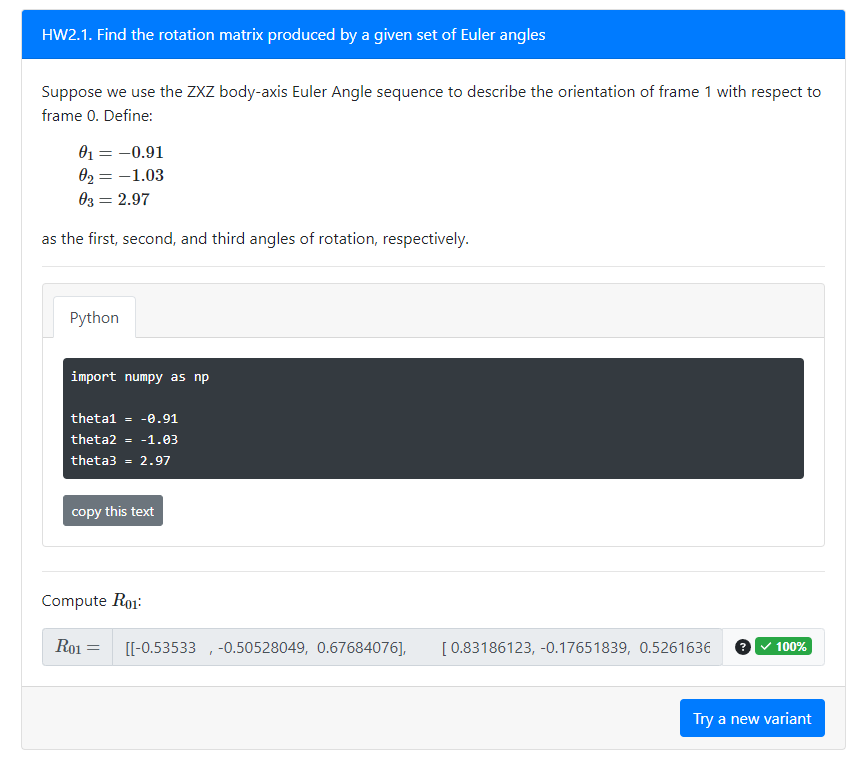

In [6]:
# ! Variant 1

# Define the Euler angles in radians
theta1 = -0.91
theta2 = -1.03
theta3 = 2.97


# * Depending on the question, call x, y, or z rotation matrix
R_1 = get_z_rotation_matrix(theta1)
R_2 = get_x_rotation_matrix(theta2)
R_3 = get_z_rotation_matrix(theta3)

# Compute the composite rotation matrix
rotation_matrix = np.dot(np.dot(R_1, R_2), R_3)

rotation_matrix


array([[-0.53533   , -0.50528049,  0.67684076],
       [ 0.83186123, -0.17651839,  0.52616361],
       [-0.14638537,  0.84470875,  0.51481884]])

In [7]:
# Define the Euler angles in radians
theta1 = -1.36
theta2 = -2.84
theta3 = 1.22


# * Depending on the question, call x, y, or z rotation matrix
R_1 = get_z_rotation_matrix(theta1)
R_2 = get_y_rotation_matrix(theta2)
R_3 = get_z_rotation_matrix(theta3)

# Compute the composite rotation matrix
rotation_matrix = np.dot(np.dot(R_1, R_2), R_3)

rotation_matrix

array([[ 0.84965345,  0.52366599, -0.06215254],
       [ 0.51736766, -0.80495968,  0.29046622],
       [ 0.102077  , -0.27895134, -0.95486462]])

## Q2.2



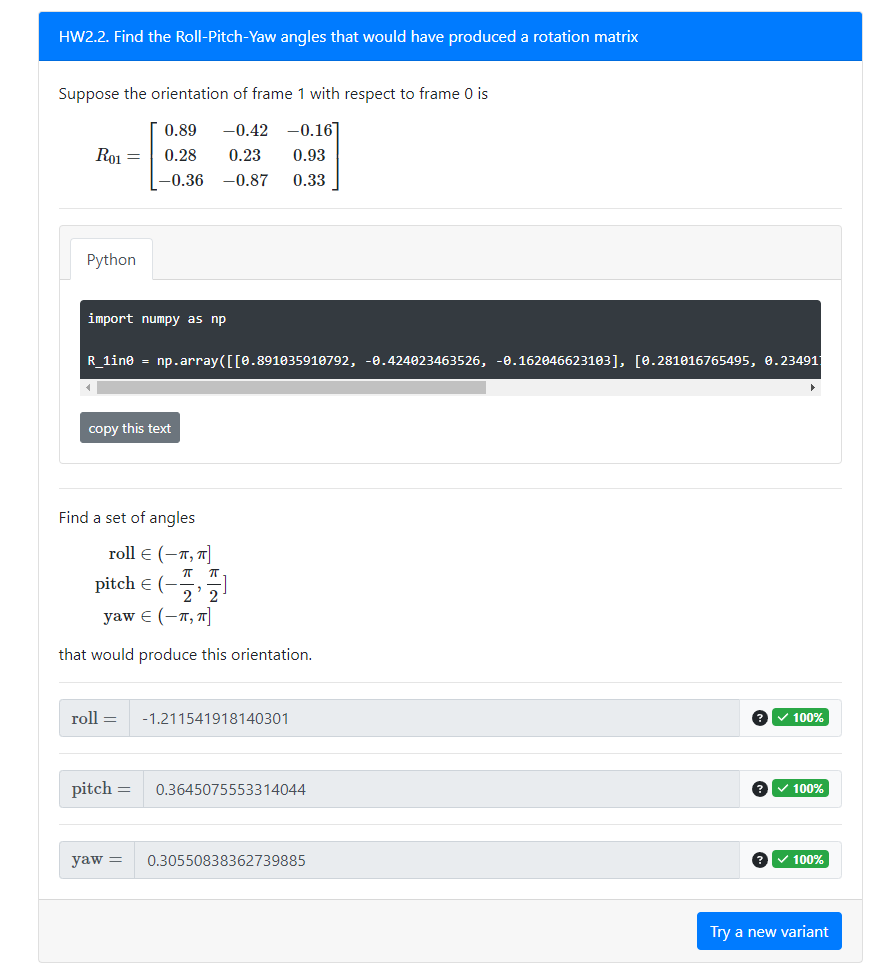

In [26]:
R_1in0 = np.array([[0.891035910792, -0.424023463526, -0.162046623103], [0.281016765495, 0.234917433428, 0.930507053699], [-0.356489246949, -0.874653017974, 0.328477571469]])

In [27]:

pitch = np.arctan2(-R_1in0[2][0], np.sqrt(R_1in0[2][1]**2 + R_1in0[2][2]**2))

if -np.pi/2 < pitch < np.pi / 2:
    roll = np.arctan(R_1in0[2][1]/ R_1in0[2][2])
    yaw = np.arctan(R_1in0[1][0]/ R_1in0[0][0])
    
else:
    yaw = None
    roll = None
    print("Singularity")
    
print("Roll (aka rotation of gamma about x-axis): ", roll)
print("Pitch (aka rotation of beta about y-axis): ", pitch)
print("Yaw (aka rotation of alpha about z-axis): ", yaw)

Roll (aka rotation of gamma about x-axis):  -1.211541918140301
Pitch (aka rotation of beta about y-axis):  0.3645075553314044
Yaw (aka rotation of alpha about z-axis):  0.30550838362739885


## Q2.3

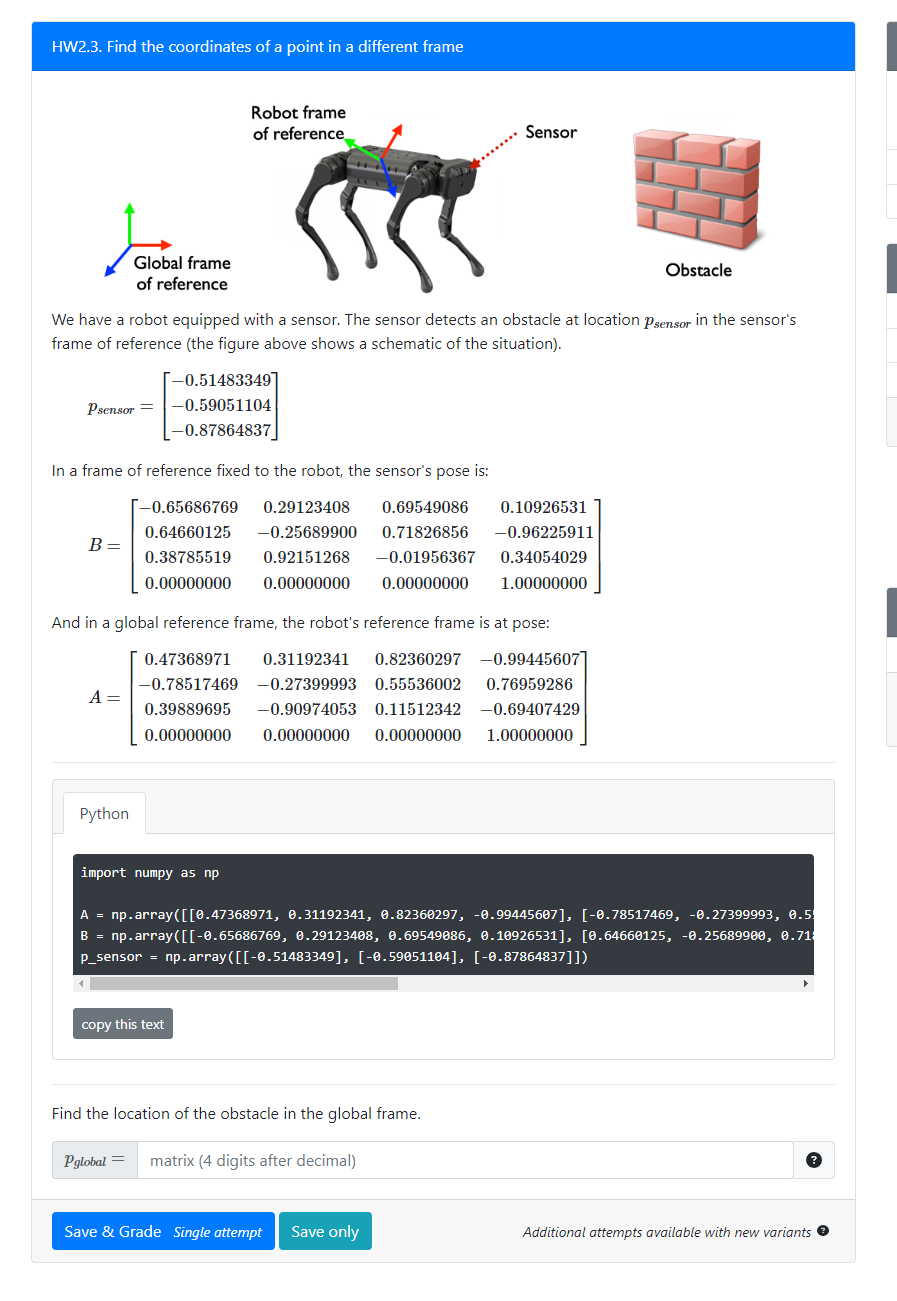

In [24]:
import numpy as np

A = np.array([[0.47368971, 0.31192341, 0.82360297, -0.99445607], [-0.78517469, -0.27399993, 0.55536002, 0.76959286], [0.39889695, -0.90974053, 0.11512342, -0.69407429], [0.00000000, 0.00000000, 0.00000000, 1.00000000]])
B = np.array([[-0.65686769, 0.29123408, 0.69549086, 0.10926531], [0.64660125, -0.25689900, 0.71826856, -0.96225911], [0.38785519, 0.92151268, -0.01956367, 0.34054029], [0.00000000, 0.00000000, 0.00000000, 1.00000000]])
p_sensor = np.array([[-0.51483349], [-0.59051104], [-0.87864837]])

In [25]:
# sensor to robot
T_robot_sensor = B

# robot to sensor
T_global_robot = A

# sensor has the same rotation frame as the robot it is on
# find the transformation matrix of the sensor using T_robot_sensor's rotation matrix
# and the sensor position vector
T_sensor_obstacle = np.array([
    [T_robot_sensor[0][0], T_robot_sensor[0][1], T_robot_sensor[0][2], p_sensor[0][0]],
    [T_robot_sensor[1][0], T_robot_sensor[1][1], T_robot_sensor[1][2], p_sensor[1][0]],
    [T_robot_sensor[2][0], T_robot_sensor[2][1], T_robot_sensor[2][2], p_sensor[2][0]],
    [T_robot_sensor[3][0], T_robot_sensor[3][1], T_robot_sensor[3][2], 1]
])

T_sensor_obstacle

# * T_global_obstacle = T_global_robot * T_robot_sensor * T_sensor_obstacle
T_global_obstacle = T_global_robot.dot(T_robot_sensor.dot(T_sensor_obstacle))
# print(T_global_obstacle)

# extract the position vector from T_global_obstacle
p_global_obstacle = np.array([[T_global_obstacle[0][3]], [T_global_obstacle[1][3]], [T_global_obstacle[2][3]]])
p_global_obstacle

array([[-2.02496884],
       [ 1.30491337],
       [ 0.7419792 ]])

## Q2.4

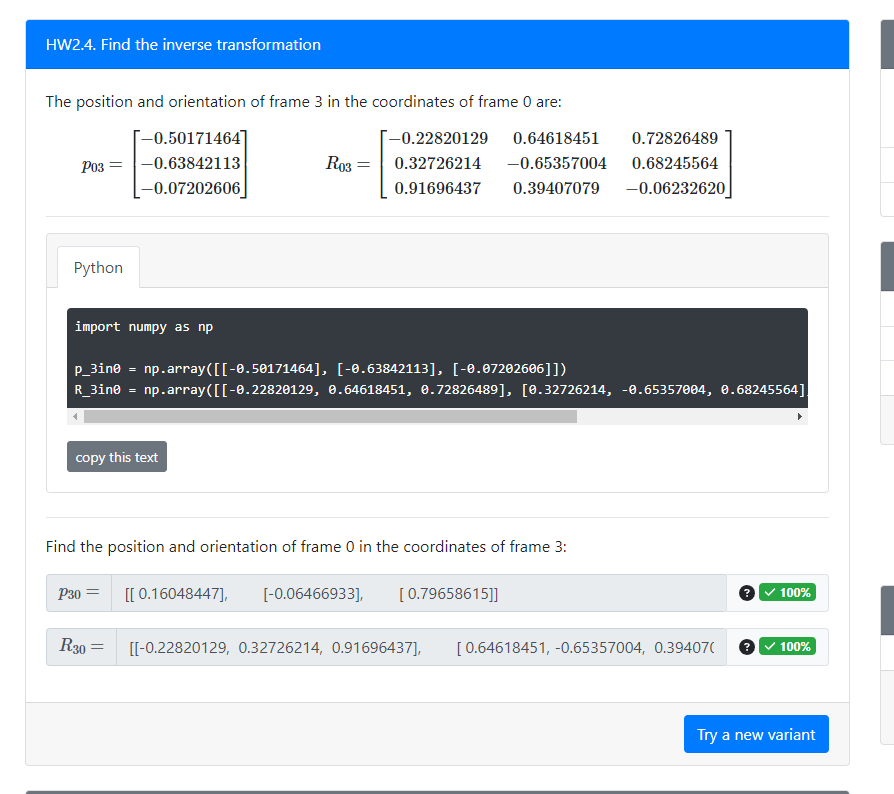

In [30]:
import numpy as np

p_3in0 = np.array([[-0.50171464], [-0.63842113], [-0.07202606]])
R_3in0 = np.array([[-0.22820129, 0.64618451, 0.72826489], [0.32726214, -0.65357004, 0.68245564], [0.91696437, 0.39407079, -0.06232620]])

# T_1in4 = np.array([
#     [R_1in4[0][0], R_1in4[0][1], R_1in4[0][2], p_1in4[0][0]],
#     [R_1in4[1][0], R_1in4[1][1], R_1in4[1][2], p_1in4[0][1]],
#     [R_1in4[2][0], R_1in4[2][1], R_1in4[2][2], p_1in4[0][2]],
#     [0, 0, 0, 1]
# ])

# get inverse for both p and R
R_0in3 = np.transpose(R_3in0)
p_0in3 = -np.dot(R_0in3, p_3in0)

R_0in3


array([[-0.22820129,  0.32726214,  0.91696437],
       [ 0.64618451, -0.65357004,  0.39407079],
       [ 0.72826489,  0.68245564, -0.0623262 ]])

In [31]:
p_0in3

array([[ 0.16048447],
       [-0.06466933],
       [ 0.79658615]])

## Q2.5

Variant 1

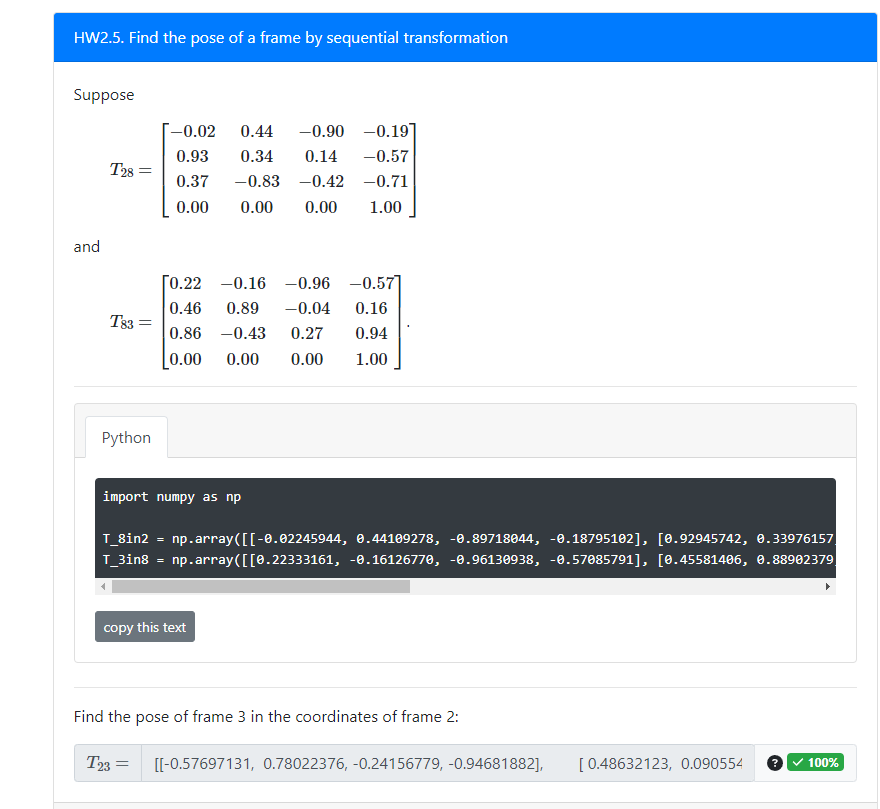

In [37]:
import numpy as np

# A = 8
# B = 2
# C = 3
T_2_8 = np.array([[-0.02245944, 0.44109278, -0.89718044, -0.18795102], [0.92945742, 0.33976157, 0.14377407, -0.56810725], [0.36824514, -0.83066193, -0.41760781, -0.71065543], [0.00000000, 0.00000000, 0.00000000, 1.00000000]])
T_8_3 = np.array([[0.22333161, -0.16126770, -0.96130938, -0.57085791], [0.45581406, 0.88902379, -0.04324636, 0.15612819], [0.86160115, -0.42852005, 0.27205520, 0.93688619], [0.00000000, 0.00000000, 0.00000000, 1.00000000]])

In [38]:


T_B_A = T_2_8
T_A_C = T_8_3

T_B_C = T_B_A.dot(T_A_C)
T_B_C

array([[-0.57697131,  0.78022376, -0.24156779, -0.94681882],
       [ 0.48632123,  0.09055459, -0.8690751 , -0.91094907],
       [-0.65619798, -0.61891094, -0.43168678, -1.44181181],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

Variant 2

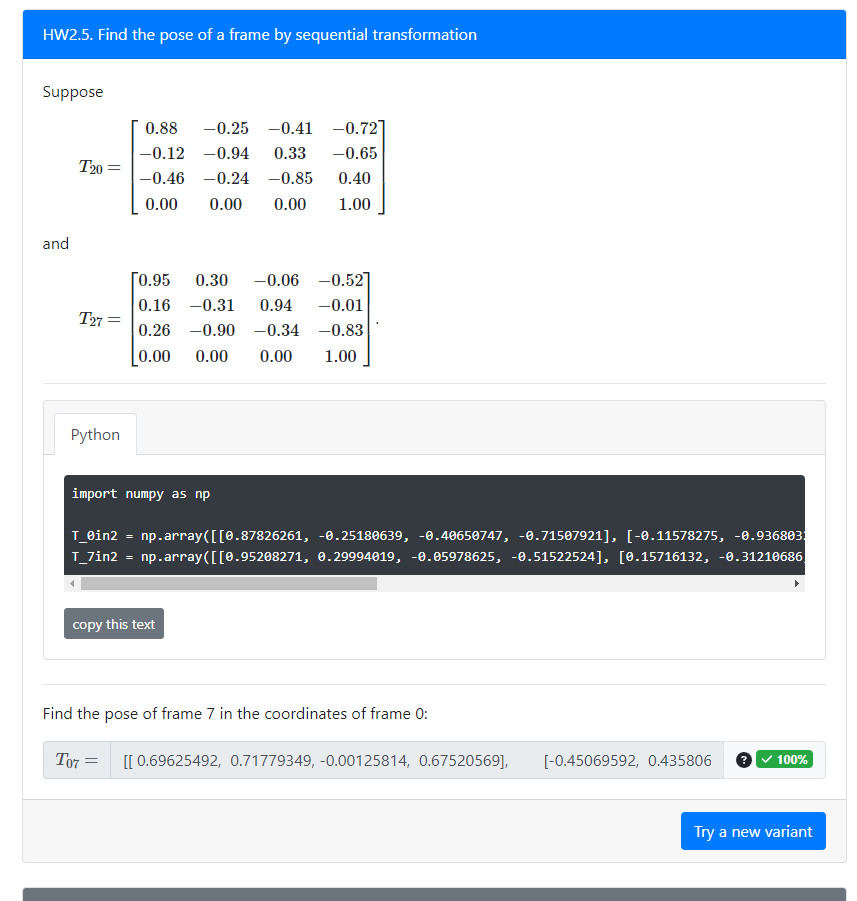

In [42]:
import numpy as np

T_2_0 = np.array([[0.87826261, -0.25180639, -0.40650747, -0.71507921], [-0.11578275, -0.93680324, 0.33014247, -0.64763872], [-0.46394950, -0.24288523, -0.85191409, 0.40400052], [0.00000000, 0.00000000, 0.00000000, 1.00000000]])
T_2_7 = np.array([[0.95208271, 0.29994019, -0.05978625, -0.51522524], [0.15716132, -0.31210686, 0.93695764, -0.01348900], [0.26237156, -0.90145726, -0.34429054, -0.83127406], [0.00000000, 0.00000000, 0.00000000, 1.00000000]])

In [45]:
# find T_0_2 from T_2_0

def take_inverse_of_transformation_matrix(matrix):
    R = matrix[:3, :3]
    p = matrix[:3, 3]
    R_inv = np.transpose(R)
    p_inv = -R_inv.dot(p)
    T_inv = np.eye(4)
    T_inv[:3, :3] = R_inv
    T_inv[:3, 3] = p_inv
    return T_inv

T_0_2 = take_inverse_of_transformation_matrix(T_2_0)

T_0_7 = T_0_2.dot(T_2_7)
T_0_7

array([[ 0.69625492,  0.71779349, -0.00125814,  0.67520569],
       [-0.45069592,  0.43580652, -0.77906731, -0.34436807],
       [-0.55866114,  0.54299648,  0.62693903,  1.18046544],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])